# Prerequisite

In [1]:
import networkx as nx
import matplotlib.pyplot as plt 
from collections import defaultdict
from dwave.system import DWaveSampler, EmbeddingComposite
import dwave.inspector

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.row {
display: flex;
}

.column {
flex: 33.33%;
padding: 5px;
}
</style>
""")

# Teams' paring
https://www.youtube.com/watch?v=Q4FE4jou5CA&list=PLPvKnT7dgEstqFp9ZB8Wpqkw1L3JNQuV3

## Problem input

In [3]:
G = nx.Graph()
G.add_edges_from([(0,4),(0,5),(1,2),(1,6),(2,4),(3,7),(5,6),(6,7)])

## Problem definition

<div>
<div style="width:image width px; 
            float: left;">
    <img src="./Images/teams paring 1.png" 
         width=420 
         style="padding-bottom:0.5em;"/>
</div>
<div style="width:image width px; 
            float: centre;">
    <img src="./Images/teams paring 2.png" 
         width=350 
         style="padding-bottom:0.5em;"/>
</div>
</div>

## Suplementary code (for Wolfram)

In [4]:
listOfEdges = list(G.edges)
f = open("clipboard.txt","w+")
for i in listOfEdges:
    #print("{ " + str(i) + " }")
    f.write(str(i))
f.close() 

def printMatrix(dict):
    np_array = np.zeros((9,9))
    np_array[0,0] = np.NaN
    for i in range(9):
        for j in range(8):
            if(i==0):
                np_array[i,j+1]= j
            else:
                if (j==0):
                    np_array[i,j]= i-1
                else:
                    np_array[i,j]=Q[(i-1,j-1)]
            
    print(np_array)

[Wolfram](./Wolfram.ipynb)

## Math formulation

In [5]:
Q = defaultdict(int)

In [6]:
#Constrain
lagrange = 1
for i in range(8):
    Q[(i,i)] += -7*lagrange
    for j in range(i+1, 8):
        Q[(i,j)] += 2*lagrange

printMatrix(Q)

[[nan  0.  1.  2.  3.  4.  5.  6.  7.]
 [ 0. -7.  2.  2.  2.  2.  2.  2.  0.]
 [ 1.  0. -7.  2.  2.  2.  2.  2.  0.]
 [ 2.  0.  0. -7.  2.  2.  2.  2.  0.]
 [ 3.  0.  0.  0. -7.  2.  2.  2.  0.]
 [ 4.  0.  0.  0.  0. -7.  2.  2.  0.]
 [ 5.  0.  0.  0.  0.  0. -7.  2.  0.]
 [ 6.  0.  0.  0.  0.  0.  0. -7.  0.]
 [ 7.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [7]:
print(G.edges)

[(0, 4), (0, 5), (4, 2), (5, 6), (1, 2), (1, 6), (6, 7), (3, 7)]


In [8]:
#Objective
for i, j in G.edges:
    Q[(i,i)] += 1
    Q[(j,j)] += 1
    Q[(i,j)] += -2

printMatrix(Q)

[[nan  0.  1.  2.  3.  4.  5.  6.  7.]
 [ 0. -5.  2.  2.  2.  0.  0.  2.  0.]
 [ 1.  0. -5.  0.  2.  2.  2.  0.  0.]
 [ 2.  0.  0. -5.  2.  2.  2.  2.  0.]
 [ 3.  0.  0.  0. -6.  2.  2.  2.  0.]
 [ 4.  0.  0. -2.  0. -5.  2.  2.  0.]
 [ 5.  0.  0.  0.  0.  0. -5.  0.  0.]
 [ 6.  0.  0.  0.  0.  0.  0. -4.  0.]
 [ 7.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [9]:
for i in range(8):
    for j in range(0,i+1):
        if(Q[(i+1,j)] != 0):
            Q[(j,i+1)] += Q[(i+1,j)]
            Q[(i+1,j)] = 0
printMatrix(Q)

[[nan  0.  1.  2.  3.  4.  5.  6.  7.]
 [ 0. -5.  2.  2.  2.  0.  0.  2.  0.]
 [ 1.  0. -5.  0.  2.  2.  2.  0.  0.]
 [ 2.  0.  0. -5.  2.  0.  2.  2.  0.]
 [ 3.  0.  0.  0. -6.  2.  2.  2.  0.]
 [ 4.  0.  0.  0.  0. -5.  2.  2.  0.]
 [ 5.  0.  0.  0.  0.  0. -5.  0.  0.]
 [ 6.  0.  0.  0.  0.  0.  0. -4.  0.]
 [ 7.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [10]:
sampler = EmbeddingComposite(DWaveSampler())
sampleset = sampler.sample_qubo(Q, num_reads=100, chain_strength=10)

In [11]:
print(sampleset)

    0  1  2  3  4  5  6  7  8 energy num_oc. chain_.
0   1  1  1  0  1  0  0  0  0  -14.0       2     0.0
1   0  1  0  1  0  0  1  1  0  -14.0       2     0.0
2   0  0  0  1  0  1  1  1  0  -14.0       2     0.0
3   1  1  1  0  1  0  0  0  1  -14.0       1     0.0
4   1  0  1  0  1  1  0  0  1  -14.0       1     0.0
5   0  1  1  0  1  0  0  0  0  -13.0       1     0.0
6   0  0  0  1  0  0  1  1  0  -13.0       1     0.0
7   1  0  0  0  0  1  1  1  0  -13.0       1     0.0
8   1  0  1  1  1  0  0  0  0  -13.0       2     0.0
9   1  0  0  1  0  1  0  1  0  -13.0       1     0.0
10  0  1  1  0  1  0  1  0  0  -13.0       2     0.0
11  0  1  1  0  1  0  1  0  1  -13.0       2     0.0
12  1  0  1  0  1  0  0  0  0  -13.0       1     0.0
13  1  0  1  1  1  0  0  0  1  -13.0       1     0.0
14  1  0  0  1  1  0  0  1  0  -13.0       1     0.0
15  1  1  1  0  1  1  0  0  0  -13.0       2     0.0
16  1  0  0  0  1  1  1  0  0  -13.0       3     0.0
17  1  0  0  1  1  1  0  0  0  -13.0       1  

# How a D-Wave System Solves Problems
https://docs.ocean.dwavesys.com/en/stable/overview/solving_problems.html

<div>
<div style="float: left;">
    <img src="./Images/How_dwave_do.png" 
         width=800 
         style="padding-bottom:0.5em;"/>
</div>

## The Boolean NOT, AND gates example

https://docs.ocean.dwavesys.com/en/stable/overview/solving_problems.html

Problem Truth Table for NOT gate

| x_1 | x_2 | NOT(x_1) | BQM Value |
|-----|-----|----------|-----------|
| 0   | 1   | yes      | 0         |
| 1   | 0   | yes      | 0         |   
| 0   | 0   | no       | 1         |
| 1   | 1   | no       | 1         |

#### Solving equations to get objective function (by hand)

<div class="row">
  <div class="column">
    <img src="./Images/not_gate.png" alt="NOT gate" style="width:120%">
      <figcaption>Fig.1 NOT gate</figcaption>
  </div>
  <div class="column">
    <img src="./Images/and_gate.png" alt="AND gate" style="width:120%">
      <figcaption>Fig.1 AND gate</figcaption>
  </div>
</div>

#### Using **dwavebinarycsp** to automaticaly get AND gate representation

In [12]:
import dwavebinarycsp #Library to construct a binary quadratic model from a constraint satisfaction problem with small constraints over binary variables.
import dwavebinarycsp.factories.constraint.gates as gates

# Implement AND gate
csp = dwavebinarycsp.ConstraintSatisfactionProblem(dwavebinarycsp.BINARY)
csp.add_constraint(gates.and_gate(['x1', 'x2', 'y1'])) # add an AND gate
bqm = dwavebinarycsp.stitch(csp)

bqm # x_1 ~ 0; x_2 ~ 0; x_3(i.e. y_1) ~ 6; x_1 x_2 ~ 2; etc.
#the same coefficients as you derived above (but multiplied by 2)

BinaryQuadraticModel({x1: -8.849365684682198e-12, x2: -8.843592524954147e-12, y1: 5.99999999998183}, {('x1', 'x2'): 1.9999999999997113, ('x1', 'y1'): -3.999999999995195, ('x2', 'y1'): -3.9999999999952074}, 1.3273382393208522e-11, 'BINARY')

#### Sampling AND gate

Used:
- dimod.BinaryQuadraticModel() ---> **Encodes a binary quadratic model**; superclass that contains the Ising model and the QUBO
- dwave.system.LeapHybridSampler() ---> class for using Leap’s cloud-based hybrid BQM solvers

In [13]:
import dimod
from dwave.system import LeapHybridSampler

bqm = dimod.BinaryQuadraticModel({'x1': 0.0, 'x2': 0.0, 'y1': 6.0},
                 {('x2', 'x1'): 2.0, ('y1', 'x1'): -4.0, ('y1', 'x2'): -4.0},
                 0, 'BINARY')

In [14]:
sampler = LeapHybridSampler()    
answer = sampler.sample(bqm)   
print(answer)    

  x1 x2 y1 energy num_oc.
0  1  1  1    0.0       1
['BINARY', 1 rows, 1 samples, 3 variables]


Used:  
- dwave.system.**EmbeddingComposite()** ---> Automatically **minor-embeds** a problem into a structured sampler such as a D-Wave system
- dwave.system.**DWaveSampler()** ---> class for using the D-Wave system as a sampler for binary quadratic models.

In [41]:
from dwave.system import DWaveSampler, EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())

Q = {('x1', 'x1'): 0, ('x2', 'x2'): 0, ('y1', 'y1'): 6, ('x2', 'x1'): 2, ('y1', 'x1'): -4, ('y1', 'x2'): -4}
response = sampler.sample_qubo(Q, num_reads=50)
print(response)    

  x1 x2 y1 energy num_oc. chain_.
0  0  1  0    0.0       9     0.0
1  1  0  0    0.0      11     0.0
2  0  0  0    0.0      21     0.0
3  1  1  1    0.0       9     0.0
['BINARY', 4 rows, 50 samples, 3 variables]


#### Sampling NOT gate

In [34]:
from dwave.system import DWaveSampler, EmbeddingComposite
sampler = EmbeddingComposite(DWaveSampler())

Q = {('x', 'x'): -1, ('x', 'z'): 2, ('z', 'x'): 0, ('z', 'z'): -1}
sampleset = sampler.sample_qubo(Q, num_reads=50)
print(sampleset)        

   x  z energy num_oc. chain_.
0  0  1   -1.0    2595     0.0
1  1  0   -1.0    2404     0.0
2  0  0    0.0       1     0.0
['BINARY', 3 rows, 5000 samples, 2 variables]


## Improve the Solutions - The Problem Inspector

In [42]:
# D-wave Problem Inspector
dwave.inspector.show(response)

'http://127.0.0.1:18000/?problemId=16436207-a706-46b0-bb29-45983a552e20'

# Map coloring

## Coupling Two Regions

In [12]:
import networkx as nx

import matplotlib
matplotlib.use("agg")   # select backend
import matplotlib.pyplot as plt
%matplotlib inline

Problem input

Nodes:  ['bc', 'ab', 'sk', 'mb', 'on', 'qc', 'nl', 'nb', 'pe', 'ns', 'yt', 'nt', 'nu'] 

Edges:  [('bc', 'ab'), ('bc', 'nt'), ('bc', 'yt'), ('ab', 'sk'), ('ab', 'nt'), ('sk', 'mb'), ('sk', 'nt'), ('mb', 'on'), ('mb', 'nu'), ('on', 'qc'), ('qc', 'nb'), ('qc', 'nl'), ('nb', 'ns'), ('yt', 'nt'), ('nt', 'nu')] 



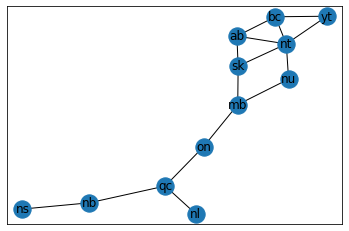

['bc', 'ab', 'nt', 'yt', 'sk', 'mb', 'on', 'nu', 'qc', 'nb', 'nl', 'ns']


In [23]:
class Province:
    def __init__(self, name):
        self.name = name
        self.red = name + "_r"
        self.green = name + "_g"
        self.blue = name + "_b"
        self.yellow = name + "_y"

# Set up provinces
bc = Province("bc")   # British Columbia
ab = Province("ab")   # Alberta
sk = Province("sk")   # Saskatchewan
mb = Province("mb")   # Manitoba
on = Province("on")   # Ontario
qc = Province("qc")   # Quebec
nl = Province("nl")   # Newfoundland and Labrador
nb = Province("nb")   # New Brunswick
pe = Province("pe")   # Prince Edward Island
ns = Province("ns")   # Nova Scotia
yt = Province("yt")   # Yukon
nt = Province("nt")   # Northwest Territories
nu = Province("nu")   # Nunavut

provinces = [bc, ab, sk, mb, on, qc, nl, nb, pe, ns, yt, nt, nu]

# Set up province neighbours (i.e. shares a border)
neighbours = [(bc, ab),
              (bc, nt),
              (bc, yt),
              (ab, sk),
              (ab, nt),
              (sk, mb),
              (sk, nt),
              (mb, on),
              (mb, nu),
              (on, qc),
              (qc, nb),
              (qc, nl),
              (nb, ns),
              (yt, nt),
              (nt, nu)]

# Hard code node positions to be reminiscent of the map of Canada
node_positions = {"bc": (0, 1),
                  "ab": (2, 1),
                  "sk": (4, 1),
                  "mb": (6, 1),
                  "on": (8, 1),
                  "qc": (10, 1),
                  "nb": (10, 0),
                  "ns": (12, 0),
                  "pe": (12, 1),
                  "nl": (12, 2),
                  "yt": (0, 3),
                  "nt": (2, 3),
                  "nu": (6, 3)}

nodes = [u.name for u in provinces]
print("Nodes: ", nodes, "\n")
edges = [(u.name, v.name) for u, v in neighbours]
print("Edges: ", edges, "\n")

G = nx.Graph(edges)
nx.draw_networkx(G)
plt.show()
print(G.nodes)

add to Graph lonely nodes 

{'qc', 'nu', 'ab', 'nl', 'on', 'bc', 'pe', 'ns', 'yt', 'nt', 'sk', 'mb', 'nb'}  

{'qc', 'nu', 'ab', 'nl', 'on', 'bc', 'ns', 'yt', 'nt', 'sk', 'mb', 'nb'}  

{'pe'}


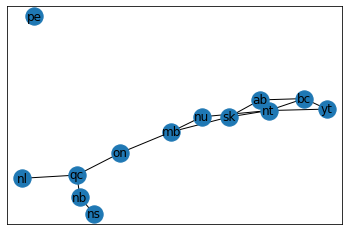

In [27]:
lone_nodes = set(nodes) - set(G.nodes)  # nodes without edges
print(set(nodes), " \n")
print(set(G.nodes), " \n")
print(lone_nodes)
for lone_node in lone_nodes:
    G.add_node(lone_node)

nx.draw_networkx(G)
plt.show()

get regions' colors (used precomputed "best_solution")

In [33]:
best_solution = {'ab_b': 0, 'ab_g': 1, 'ab_r': 0, 'ab_y': 0, 'bc_b': 0, 'bc_g': 0, 'bc_r': 1, 'bc_y': 0, 'mb_b': 0, 'mb_g': 0, 'mb_r': 0, 'mb_y': 1, 'nb_b': 1, 'nb_g': 0, 'nb_r': 0, 'nb_y': 0, 'nl_b': 1, 'nl_g': 0, 'nl_r': 0, 'nl_y': 0, 'ns_b': 0, 'ns_g': 0, 'ns_r': 1, 'ns_y': 0, 'nt_b': 0, 'nt_g': 0, 'nt_r': 0, 'nt_y': 1, 'nu_b': 1, 'nu_g': 0, 'nu_r': 0, 'nu_y': 0, 'on_b': 0, 'on_g': 0, 'on_r': 1, 'on_y': 0, 'pe_b': 0, 'pe_g': 0, 'pe_r': 0, 'pe_y': 1, 'qc_b': 0, 'qc_g': 0, 'qc_r': 0, 'qc_y': 1, 'sk_b': 1, 'sk_g': 0, 'sk_r': 0, 'sk_y': 0, 'yt_b': 0, 'yt_g': 1, 'yt_r': 0, 'yt_y': 0}

# Grab the colors selected by sample
color_labels = [k for k, v in best_solution.items() if v == 1]

# Get color order to match that of the graph nodes
for label in color_labels:
    name, color = label.split("_")
    G.nodes[name]["color"] = color
    
for name in G.nodes:
    print(name, " --> ", G.nodes[name])

bc  -->  {'color': 'r'}
ab  -->  {'color': 'g'}
nt  -->  {'color': 'y'}
yt  -->  {'color': 'g'}
sk  -->  {'color': 'b'}
mb  -->  {'color': 'y'}
on  -->  {'color': 'r'}
nu  -->  {'color': 'b'}
qc  -->  {'color': 'y'}
nb  -->  {'color': 'b'}
nl  -->  {'color': 'b'}
ns  -->  {'color': 'r'}
pe  -->  {'color': 'y'}


In [35]:
color_map = [color for name, color in G.nodes(data="color")]
print(color_map)

['r', 'g', 'y', 'g', 'b', 'y', 'r', 'b', 'y', 'b', 'b', 'r', 'y']


The graph is saved in 'graph.png'.


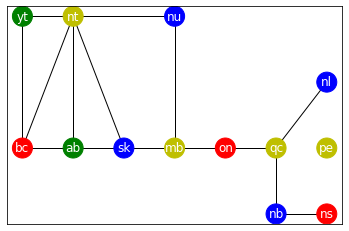

In [36]:
# Draw graph
nx.draw_networkx(G, pos=node_positions, with_labels=True,
                 node_color=color_map, font_color="w", node_size=400)

# Save graph
filename = "graph.png"
plt.savefig(filename)
print("The graph is saved in '{}'.".format(filename))


# Manually Minor-Embedded Problem

In [37]:
from dwave.system import DWaveSampler
sampler_manual = DWaveSampler(solver={'topology__type': 'chimera'})